In [1]:
import theano
from theano import tensor as T

# initialize ; define the symbols
x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()
z1 = w1 * x1 + w0

# compile 
net_input = theano.function(inputs=[w1, x1, w0], outputs=z1)

# execute
print('Net input: %.2f' % net_input(2.0, 1.0, 0.5))


Net input: 2.50


In [2]:
# CONFIGURING THEANO 
# float 64 => CPU and float 32 => GPU

print(theano.config.floatX)

float64


In [3]:
theano.config.floatX = 'float32'

In [4]:
print(theano.config.device)

cpu


In [5]:
# WORKING WITH ARRAY STRUCTURES
import numpy as np
# initilize if using 32 bit then use fmatrix
x= T.dmatrix(name='x')
x_sum=T.sum(x, axis=0)

# compile
calc_sum = theano.function(inputs=[x], outputs=x_sum)

# execute (Python List)
ary = [[1, 2, 3], [1, 2, 3]]
print('Column sum: ', calc_sum(ary))

# execute (NumPy array)
ary = np.array([[1,2,3], [1,2,3]], dtype=theano.config.floatX)
print('Column sum: ', calc_sum(ary))



Column sum:  [ 2.  4.  6.]
Column sum:  [ 2.  4.  6.]


In [11]:
# initialize 
x = T.dmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], dtype=theano.config.floatX))

z = x.dot(w.T)
update = [[w, w + 1.0]]


# compile
net_input = theano.function(inputs=[x], updates=update, outputs=z)

# execute
data = np.array([[1,2,3]], dtype=theano.config.floatX)

for i in range(5):
    print('z%d' % i, net_input(data))

z0 [[ 0.]]
z1 [[ 6.]]
z2 [[ 12.]]
z3 [[ 18.]]
z4 [[ 24.]]


In [14]:
# initialize
# don't have gpu duh 
data = np.array([[1,2,3]], dtype=theano.config.floatX)

x = T.dmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w + 1.0]]

# compile
net_input = theano.function(inputs=[], updates=update, givens={x: data}, outputs=z)

# execute
for i in range(5):
    print('z:', net_input())

TypeError: Cannot convert Type TensorType(float32, matrix) (of Variable <TensorType(float32, matrix)>) into Type TensorType(float64, matrix). You can try to manually convert <TensorType(float32, matrix)> into a TensorType(float64, matrix).

In [15]:
# linear regression 
# ordinary least squares 
x_train = np.asarray([[0.0], [1.0],
                      [2.0], [3.0],
                      [4.0], [5.0],
                      [6.0], [7.0],
                      [8.0], [9.0]], dtype=theano.config.floatX)
y_train = np.asarray([1.0, 1.3,
                      3.1, 2.0,
                      5.0, 6.3, 
                      6.6, 7.4,
                      8.0, 9.0,], dtype=theano.config.floatX)



In [24]:
# training function 
import theano
from theano import tensor as T 
import numpy as np

def train_linreg(x_train, y_train, eta, epochs):
    costs = []
    # initialize the arrays 
    eta0 = T.fscalar('eta0')
    y = T.fvector(name='y')
    x = T.fmatrix(name='x')
    
    w = theano.shared(np.zeros(shape=(x_train.shape[1] + 1), dtype = theano.config.floatX), name='w')
    
    # calculate the cost 
    net_input = T.dot(x, w[1:]) + w[0]
    errors = y - net_input
    cost = T.sum(T.pow(errors, 2))
    
    # perform gradient update
    gradient = T.grad(cost, wrt=w)
    update = [(w, w-eta0*gradient)]
    
    #compile the model
    train = theano.function(inputs=[eta0], outputs=cost, updates=update, givens={x: x_train, y: y_train})
    
    for _ in range(epochs):
        costs.append(train(eta))
        
    return costs, w 
    
# grad => derivative 




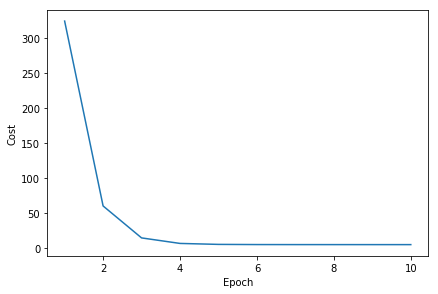

In [25]:
# sum of squared errors to check for convergence
import matplotlib.pyplot as plt 
costs, w = train_linreg(x_train, y_train, eta=0.001, epochs=10)
plt.plot(range(1, len(costs)+1), costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [27]:
# predictions 
def predict_linreg(x,w):
    xt = T.matrix(name='x')
    net_input = T.dot(xt, w[1:]) + w[0]
    predict = theano.function(inputs=[xt], givens={w: w}, outputs=net_input)
    
    return predict(x)

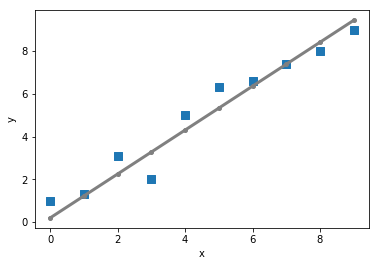

In [28]:
plt.scatter(x_train, y_train, marker='s', s=50)
plt.plot(range(x_train.shape[0]), predict_linreg(x_train, w), color='gray', marker='o', markersize=4, linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
# CHOOSING ACTIVATION FUNCTIONS FOR FEEDFORWARD NEURAL NETWORKS 
# Sigmoid ~ logistic function or negative log-likelihood 
# usually the hyperbolic tangent => usually activation in hidden layers 


In [30]:
# LOGISTIC FUNCTION RECAP 
x = np.array([[1, 1.4, 1.5]])
w = np.array([0.0, 0.2, 0.4])

def net_input(x, w):
    z = x.dot(w)
    return z 

def logistic(z):
    return 1.0/(1.0 + np.exp(-z))

def logistic_activation(x, w):
    z = net_input(x, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(x,w)[0])


P(y=1|x) = 0.707


In [36]:
# w : array, shape=[n_output_units, n_hidden_units+1]
#          Weight matrix for hidden layer -> output layer.
# note that first column(A[:][0] = 1) are the bias units

w = np.array([[1.1, 1.2, 1.3, 0.5],
              [0.1, 0.2, 0.4, 0.1],
              [0.2, 0.5, 2.1, 1.9]])

# a : array, shape = [n_hiden + 1, n_samples]
#     Activation of hidden layer 
# note that first element (A[0][0] = 1) is the bias unit

a = np.array([[1.0],
             [0.1],
             [0.3],
             [0.7]])

# z : array, shape = [n_output_units, n_samples]
#          Net input of the output layer.
z = w.dot(a)
y_probas = logistic(z)
print('Probabilities:\n', y_probas)

Probabilities:
 [[ 0.87653295]
 [ 0.57688526]
 [ 0.90114393]]


In [37]:
y_class = np.argmax(z, axis=0)
print('predicted class label: %d' % y_class[0])


predicted class label: 2


In [38]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def softmax_activation(x,w):
    z = net_input(x, w)
    return softmax(z)

y_probas = softmax(z)
print('probabilities:\n', y_probas)
    

probabilities:
 [[ 0.40386493]
 [ 0.07756222]
 [ 0.51857284]]


In [39]:
y_probas.sum()

1.0

In [40]:
y_class = np.argmax(z, axis=0)
print('predicted class label: %d' % y_class[0])


predicted class label: 2


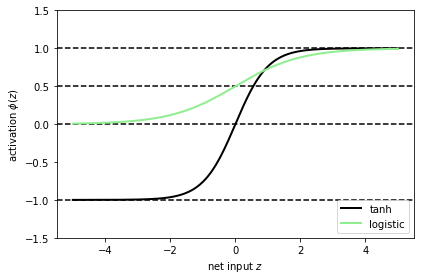

In [41]:
# BROADENING THE OUTPUT SPECTRUM BY USING A HYPERBOLIC TANGENT 
import matplotlib.pyplot as plt 
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)
z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0.5, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(-1, color='black', linestyle='--')

plt.plot(z, tanh_act, linewidth=2, color='black', label='tanh')
plt.plot(z, log_act, linewidth=2, color='lightgreen', label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [42]:
tanh_act = np.tanh(z)
from scipy.special import expit 
log_act = expit(z)

In [43]:
# TRANING NEURALS NETWORKS EFFICIENTLY USING KERAS 
import os
os.getcwd()


'/Users/toul/MLpython'

In [46]:
os.chdir('/Users/toul/Downloads')
os.getcwd()
os.listdir()

['.DS_Store',
 '.localized',
 'aclImdb',
 'aclImdb_v1.tar',
 'hw_how_to.pdf',
 'mnist',
 'style.css.webarchive',
 'UnsignedDocument.pdf']

In [47]:
import os 
import struct
import numpy as np
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint(8).reshape(len(labels), 784))
        return images, labels 
    
    x_train, y_train = load_mnist('mnist', kind='train')
    print('rows: %d, columns: %d' % (x_train.shape[0], x_train.shape[1]))
    x_test, y_test = load_mnist('mnist', kind='t10k')

In [56]:
import theano
theano.config.floatX = 'float32'





NameError: name 'x_test' is not defined

In [58]:
X_train = X_train.astype(theano.config.floatX)
X_test = X_test.astype(theano.config.floatX)

NameError: name 'X_train' is not defined

In [55]:

from keras.utils import np_utils
print('First 3 labels: ', y_train[:3])
y_train_ohe = np_utils.to_categorical(y_train)
print('\nFirsnt 3 labels (one-hot): \n', y_train_ohe[:3])

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'